# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [3]:
# Print the city count to confirm sufficient count
len(cities)

611

In [4]:
# replace spaces in city names
cities = [i.replace(' ', '+') for i in cities]

for i in cities:
    print(i)

palabuhanratu
longyearbyen
mataura
caravelas
cumbum
hithadhoo
souillac
port+alfred
cap+malheureux
shelburne
rikitea
georgetown
ushuaia
kaitangata
yingkou
basmat
albany
taolanaro
kavieng
north+bend
bethel
consett
lodja
the+valley
bredasdorp
tasiilaq
komsomolskiy
vestmanna
camden
qaanaaq
iqaluit
ixtapa
busselton
constitucion
punta+arenas
chapais
karasburg
buala
nenjiang
avarua
vysokogornyy
salym
kudahuvadhoo
eureka
vaini
upernavik
jamestown
krasnoborsk
micheweni
hobart
poiana+blenchii
andenes
pevek
ossora
cidreira
tarudant
bowen
port+hardy
lethem
atkarsk
cape+town
saint+george
butaritari
barrow
ekhabi
lolua
margate
maarianhamina
puerto+ayora
alofi
ambovombe
tanete
torbay
ocho+rios
luderitz
sambava
sisimiut
saint-joseph
bluff
klyuchi
lavrentiya
kushima
faanui
castro
makakilo+city
ostrovnoy
beitbridge
saint-paul
atuona
ndouci
victoria
katsuura
yellowknife
vardo
hibbing
illoqqortoormiut
beloha
khatanga
east+london
mahebourg
hasaki
esperance
zhireken
aykhal
vestbygda
shingu
ilulissat
bonthe


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
weather_data = []

base_url = f'https://api.openweathermap.org/data/2.5/weather?'

counter = 0

for city in cities:
    counter = counter + 1
    print(f'Making request number {counter} for current weather data in {city}.')
    
    try:
        url = f'{base_url}q={city}&appid={weather_api_key}'
        response = requests.get(url).json()
        weather_data.append(response)
        
    except:
        print(f'City not found. Skipping...')

Making request number 1 for current weather data in palabuhanratu.
Making request number 2 for current weather data in longyearbyen.
Making request number 3 for current weather data in mataura.
Making request number 4 for current weather data in caravelas.
Making request number 5 for current weather data in cumbum.
Making request number 6 for current weather data in hithadhoo.
Making request number 7 for current weather data in souillac.
Making request number 8 for current weather data in port+alfred.
Making request number 9 for current weather data in cap+malheureux.
Making request number 10 for current weather data in shelburne.
Making request number 11 for current weather data in rikitea.
Making request number 12 for current weather data in georgetown.
Making request number 13 for current weather data in ushuaia.
Making request number 14 for current weather data in kaitangata.
Making request number 15 for current weather data in yingkou.
Making request number 16 for current weather 

Making request number 131 for current weather data in north+myrtle+beach.
Making request number 132 for current weather data in tocopilla.
Making request number 133 for current weather data in marawi.
Making request number 134 for current weather data in santa+rosalia.
Making request number 135 for current weather data in mporokoso.
Making request number 136 for current weather data in rungata.
Making request number 137 for current weather data in dali.
Making request number 138 for current weather data in salas.
Making request number 139 for current weather data in dunedin.
Making request number 140 for current weather data in hermanus.
Making request number 141 for current weather data in werda.
Making request number 142 for current weather data in sistranda.
Making request number 143 for current weather data in ust-kuyga.
Making request number 144 for current weather data in golyshmanovo.
Making request number 145 for current weather data in tuktoyaktuk.
Making request number 146 fo

Making request number 259 for current weather data in jacksonville.
Making request number 260 for current weather data in champerico.
Making request number 261 for current weather data in ahmadpur+east.
Making request number 262 for current weather data in fomboni.
Making request number 263 for current weather data in belushya+guba.
Making request number 264 for current weather data in fukue.
Making request number 265 for current weather data in jawhar.
Making request number 266 for current weather data in naurskaya.
Making request number 267 for current weather data in bengkulu.
Making request number 268 for current weather data in mount+hagen.
Making request number 269 for current weather data in saint-raphael.
Making request number 270 for current weather data in manyana.
Making request number 271 for current weather data in longyan.
Making request number 272 for current weather data in synya.
Making request number 273 for current weather data in thompson.
Making request number 274 

Making request number 387 for current weather data in kenora.
Making request number 388 for current weather data in katobu.
Making request number 389 for current weather data in guerrero+negro.
Making request number 390 for current weather data in broome.
Making request number 391 for current weather data in mitsamiouli.
Making request number 392 for current weather data in yinchuan.
Making request number 393 for current weather data in karangasem.
Making request number 394 for current weather data in solnechnyy.
Making request number 395 for current weather data in sao+joao+da+barra.
Making request number 396 for current weather data in north+platte.
Making request number 397 for current weather data in acarau.
Making request number 398 for current weather data in marystown.
Making request number 399 for current weather data in vaitupu.
Making request number 400 for current weather data in borgarnes.
Making request number 401 for current weather data in sungaipenuh.
Making request num

Making request number 515 for current weather data in havre.
Making request number 516 for current weather data in ulvik.
Making request number 517 for current weather data in gotsu.
Making request number 518 for current weather data in xixiang.
Making request number 519 for current weather data in limbuhan.
Making request number 520 for current weather data in coihaique.
Making request number 521 for current weather data in sao+filipe.
Making request number 522 for current weather data in zhangye.
Making request number 523 for current weather data in hastings.
Making request number 524 for current weather data in port-gentil.
Making request number 525 for current weather data in maykain.
Making request number 526 for current weather data in mrirt.
Making request number 527 for current weather data in san+jose.
Making request number 528 for current weather data in kutum.
Making request number 529 for current weather data in skibotn.
Making request number 530 for current weather data in

In [6]:
pprint(weather_data)

[{'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': 78.2186, 'lon': 15.6401},
  'dt': 1615083218,
  'id': 2729907,
  'main': {'feels_like': 247.85,
           'humidity': 71,
           'pressure': 1017,
           'temp': 256.15,
           'temp_max': 256.15,
           'temp_min': 256.15},
  'name': 'Longyearbyen',
  'sys': {'country': 'SJ',
          'id': 1663,
          'sunrise': 1615098871,
          'sunset': 1615131760,
          'type': 1},
  'timezone': 3600,
  'visibility': 10000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 120, 'speed': 6.69}},
 {'base': 'stations',
  'clouds': {'all': 66},
  'cod': 200,
  'coord': {'lat': -46.1927, 'lon': 168.8643},
  'dt': 1615083392,
  'id': 6201424,
  'main': {'feels_like': 281.26,
           'humidity': 69,
           'pressure': 996,
           't

               'main': 'Clouds'}],
  'wind': {'deg': 140, 'speed': 1.03}},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': 62.1564, 'lon': -7.1664},
  'dt': 1615083401,
  'id': 2610343,
  'main': {'feels_like': 273.67,
           'humidity': 100,
           'pressure': 1023,
           'temp': 277.15,
           'temp_max': 277.15,
           'temp_min': 277.15},
  'name': 'Vestmanna',
  'sys': {'country': 'FO',
          'id': 1596,
          'sunrise': 1615101130,
          'sunset': 1615140446,
          'type': 1},
  'timezone': 0,
  'visibility': 10000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 150, 'speed': 3.09}},
 {'base': 'stations',
  'clouds': {'all': 54},
  'cod': 200,
  'coord': {'lat': 39.7835, 'lon': -74.9663},
  'dt': 1615083256,
  'id': 4501019,
  'main': {'feels_like': 270.47,
           'humidity': 60,
           'pressu

  'timezone': 46800,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 290, 'speed': 6.17}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 72.7868, 'lon': -56.1549},
  'dt': 1615083407,
  'id': 3418910,
  'main': {'feels_like': 242.84,
           'grnd_level': 1018,
           'humidity': 88,
           'pressure': 1018,
           'sea_level': 1018,
           'temp': 249.51,
           'temp_max': 249.51,
           'temp_min': 249.51},
  'name': 'Upernavik',
  'sys': {'country': 'GL', 'sunrise': 1615028218, 'sunset': 1615064099},
  'timezone': -10800,
  'visibility': 2690,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 4, 'speed': 4.19}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'l

  'timezone': -32400,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 130, 'speed': 4.12}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 53.5102, 'lon': 142.9671},
  'dt': 1615083414,
  'id': 2122614,
  'main': {'feels_like': 245.47,
           'grnd_level': 1013,
           'humidity': 87,
           'pressure': 1016,
           'sea_level': 1016,
           'temp': 253.56,
           'temp_max': 253.56,
           'temp_min': 253.56},
  'name': 'Ekhabi',
  'sys': {'country': 'RU', 'sunrise': 1615064570, 'sunset': 1615104955},
  'timezone': 39600,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 292, 'speed': 6.38}},
 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 8

           'humidity': 85,
           'pressure': 998,
           'temp': 263.33,
           'temp_max': 263.71,
           'temp_min': 263.15},
  'name': 'Yellowknife',
  'sys': {'country': 'CA',
          'id': 1007,
          'sunrise': 1615040620,
          'sunset': 1615079627,
          'type': 1},
  'timezone': -25200,
  'visibility': 10000,
  'weather': [{'description': 'snow',
               'icon': '13n',
               'id': 601,
               'main': 'Snow'}],
  'wind': {'deg': 300, 'speed': 4.63}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 70.3705, 'lon': 31.1107},
  'dt': 1615083352,
  'id': 777019,
  'main': {'feels_like': 262.1,
           'grnd_level': 998,
           'humidity': 97,
           'pressure': 999,
           'sea_level': 999,
           'temp': 270.36,
           'temp_max': 270.36,
           'temp_min': 270.36},
  'name': 'Vardø',
  'snow': {'1h': 0.13720000000000002},
  'sys': {'country': 'NO', 'sunrise': 1615092

           'pressure': 1012,
           'sea_level': 1012,
           'temp': 295.88,
           'temp_max': 295.88,
           'temp_min': 295.88},
  'name': 'Corrente',
  'rain': {'1h': 0.3628},
  'sys': {'country': 'BR', 'sunrise': 1615021195, 'sunset': 1615064971},
  'timezone': -10800,
  'visibility': 10000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 52, 'speed': 0.89}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 57.4953, 'lon': 60.2112},
  'dt': 1615083432,
  'id': 1497795,
  'main': {'feels_like': 247.03,
           'grnd_level': 980,
           'humidity': 91,
           'pressure': 1011,
           'sea_level': 1011,
           'temp': 251.85,
           'temp_max': 251.85,
           'temp_min': 251.85},
  'name': "Nev'yansk",
  'sys': {'country': 'RU', 'sunrise': 1615084639, 'sunset': 1615124602},
  'timezone': 18000,
  'visibility':

           'humidity': 93,
           'pressure': 1013,
           'sea_level': 1013,
           'temp': 255.94,
           'temp_max': 255.94,
           'temp_min': 255.94},
  'name': 'Golyshmanovo',
  'sys': {'country': 'RU', 'sunrise': 1615082613, 'sunset': 1615122711},
  'timezone': 18000,
  'visibility': 10000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 237, 'speed': 3.39}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 69.4541, 'lon': -133.0374},
  'dt': 1615083442,
  'id': 6170031,
  'main': {'feels_like': 242.43,
           'humidity': 77,
           'pressure': 1008,
           'temp': 250.15,
           'temp_max': 250.15,
           'temp_min': 250.15},
  'name': 'Tuktoyaktuk',
  'sys': {'country': 'CA',
          'id': 942,
          'sunrise': 1615045954,
          'sunset': 1615083260,
          'type': 1},
  'timezone': -2

  'coord': {'lat': -20.9667, 'lon': 164.7},
  'dt': 1615083450,
  'id': 2137748,
  'main': {'feels_like': 301.4,
           'grnd_level': 1009,
           'humidity': 58,
           'pressure': 1010,
           'sea_level': 1010,
           'temp': 300.92,
           'temp_max': 300.92,
           'temp_min': 300.92},
  'name': 'Voh',
  'sys': {'country': 'NC', 'sunrise': 1615057237, 'sunset': 1615101858},
  'timezone': 39600,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 174, 'speed': 3.76}},
 {'base': 'stations',
  'clouds': {'all': 1},
  'cod': 200,
  'coord': {'lat': 51.1834, 'lon': -114.4687},
  'dt': 1615083451,
  'id': 5924618,
  'main': {'feels_like': 268.7,
           'humidity': 80,
           'pressure': 1007,
           'temp': 273.56,
           'temp_max': 274.26,
           'temp_min': 273.15},
  'name': 'Cochrane',
  'sys': {'country': 'CA

               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 100, 'speed': 2.76}},
 {'base': 'stations',
  'clouds': {'all': 1},
  'cod': 200,
  'coord': {'lat': -35.1667, 'lon': 173.1667},
  'dt': 1615083458,
  'id': 2194098,
  'main': {'feels_like': 289.57,
           'grnd_level': 1002,
           'humidity': 58,
           'pressure': 1004,
           'sea_level': 1004,
           'temp': 293.75,
           'temp_max': 293.75,
           'temp_min': 293.75},
  'name': 'Ahipara',
  'sys': {'country': 'NZ', 'sunrise': 1615054757, 'sunset': 1615100275},
  'timezone': 46800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 237, 'speed': 6.88}},
 {'base': 'stations',
  'clouds': {'all': 20},
  'cod': 200,
  'coord': {'lat': 22.8909, 'lon': -109.9124},
  'dt': 1615083381,
  'id': 3985710,
  'main': {'feels_like': 292.91,
           'humidity': 73,


  'dt': 1615083464,
  'id': 2139521,
  'main': {'feels_like': 302.67,
           'humidity': 51,
           'pressure': 1010,
           'temp': 303.15,
           'temp_max': 303.15,
           'temp_min': 303.15},
  'name': 'Noumea',
  'sys': {'country': 'NC',
          'id': 7344,
          'sunrise': 1615056779,
          'sunset': 1615101473,
          'type': 1},
  'timezone': 39600,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 200, 'speed': 5.14}},
 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 6},
  'cod': 200,
  'coord': {'lat': -22.6667, 'lon': 167.4833},
  'dt': 1615083465,
  'id': 2137773,
  'main': {'feels_like': 295.81,
           'grnd_level': 1000,
           'humidity': 72,
           'pressure': 1010,
           'sea_level': 1010,
           'temp': 297.28,
           'temp_max': 297.28,
           't

  'dt': 1615083472,
  'id': 5864145,
  'main': {'feels_like': 266.14,
           'humidity': 64,
           'pressure': 1011,
           'temp': 271.52,
           'temp_max': 273.15,
           'temp_min': 268.71},
  'name': 'Homer',
  'sys': {'country': 'US',
          'id': 7709,
          'sunrise': 1615049286,
          'sunset': 1615088811,
          'type': 1},
  'timezone': -32400,
  'visibility': 10000,
  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 30, 'speed': 3.6}},
 {'base': 'stations',
  'clouds': {'all': 99},
  'cod': 200,
  'coord': {'lat': 1.9356, 'lon': -76.2406},
  'dt': 1615083472,
  'id': 3792389,
  'main': {'feels_like': 289.3,
           'grnd_level': 823,
           'humidity': 88,
           'pressure': 1013,
           'sea_level': 1013,
           'temp': 288.82,
           'temp_max': 288.82,
           'temp_min': 288.82},
  'name': 'Isnos',
  'sys': {'

           'pressure': 998,
           'sea_level': 998,
           'temp': 266.42,
           'temp_max': 266.42,
           'temp_min': 266.42},
  'name': 'Baykit',
  'sys': {'country': 'RU', 'sunrise': 1615076295, 'sunset': 1615115593},
  'timezone': 25200,
  'visibility': 1018,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 189, 'speed': 2.73}},
 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 70},
  'cod': 200,
  'coord': {'lat': 27.9167, 'lon': 96.1667},
  'dt': 1615083479,
  'id': 1254709,
  'main': {'feels_like': 293.9,
           'grnd_level': 995,
           'humidity': 25,
           'pressure': 1020,
           'sea_level': 1020,
           'temp': 295.89,
           'temp_max': 295.89,
           'temp_min': 295.89},
  'name': 'Tezu',
  'sys': {'country': 'IN', 'sunrise': 1615074842, 'sunset': 1615117143},
  'timezone': 19800

               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 11, 'speed': 1.33}},
 {'base': 'stations',
  'clouds': {'all': 38},
  'cod': 200,
  'coord': {'lat': -23.4, 'lon': 21.7167},
  'dt': 1615083487,
  'id': 933416,
  'main': {'feels_like': 293.18,
           'grnd_level': 884,
           'humidity': 44,
           'pressure': 1013,
           'sea_level': 1013,
           'temp': 294.31,
           'temp_max': 294.31,
           'temp_min': 294.31},
  'name': 'Manyana',
  'sys': {'country': 'BW', 'sunrise': 1615091496, 'sunset': 1615136220},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 14, 'speed': 1.1}},
 {'base': 'stations',
  'clouds': {'all': 69},
  'cod': 200,
  'coord': {'lat': 25.1072, 'lon': 117.0225},
  'dt': 1615083352,
  'id': 1802276,
  'main': {'feels_like': 292.3,

  'cod': 200,
  'coord': {'lat': -4.6667, 'lon': -73.5167},
  'dt': 1615083496,
  'id': 3692020,
  'main': {'feels_like': 301.34,
           'grnd_level': 999,
           'humidity': 95,
           'pressure': 1011,
           'sea_level': 1011,
           'temp': 296.64,
           'temp_max': 296.64,
           'temp_min': 296.64},
  'name': 'Saquena',
  'sys': {'country': 'PE', 'sunrise': 1615028415, 'sunset': 1615072234},
  'timezone': -18000,
  'visibility': 10000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 292, 'speed': 0.49}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 57.0531, 'lon': -135.33},
  'dt': 1615083497,
  'id': 5557293,
  'main': {'feels_like': 275.08,
           'humidity': 56,
           'pressure': 1003,
           'temp': 279.15,
           'temp_max': 279.15,
           'temp_min': 279.15},
  'name': 'Sitka',
  '

  'cod': 200,
  'coord': {'lat': 47.3821, 'lon': -61.8597},
  'dt': 1615083503,
  'id': 5915327,
  'main': {'feels_like': 262.3,
           'humidity': 74,
           'pressure': 1011,
           'temp': 269.15,
           'temp_max': 269.15,
           'temp_min': 269.15},
  'name': 'Cap-aux-Meules',
  'sys': {'country': 'CA',
          'id': 274,
          'sunrise': 1615027077,
          'sunset': 1615067978,
          'type': 1},
  'timezone': -14400,
  'visibility': 5102,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 210, 'gust': 9.26, 'speed': 5.66}},
 {'base': 'stations',
  'clouds': {'all': 1},
  'cod': 200,
  'coord': {'lat': 37.6985, 'lon': -77.6125},
  'dt': 1615083492,
  'id': 4794814,
  'main': {'feels_like': 270.38,
           'humidity': 55,
           'pressure': 1023,
           'temp': 274.91,
           'temp_max': 277.04,
           'temp_min': 274.15},
  

 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 14.25, 'lon': 75.6667},
  'dt': 1615083510,
  'id': 1269970,
  'main': {'feels_like': 295.42,
           'grnd_level': 950,
           'humidity': 76,
           'pressure': 1014,
           'sea_level': 1014,
           'temp': 294.05,
           'temp_max': 294.05,
           'temp_min': 294.05},
  'name': 'Honnāli',
  'sys': {'country': 'IN', 'sunrise': 1615079428, 'sunset': 1615122396},
  'timezone': 19800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 173, 'speed': 1.16}},
 {'base': 'stations',
  'clouds': {'all': 31},
  'cod': 200,
  'coord': {'lat': -34.5833, 'lon': 150.8552},
  'dt': 1615083510,
  'id': 6255012,
  'main': {'feels_like': 298.85,
           'humidity': 59,
           'pressure': 1008,
           'temp': 298.24,
           'temp_max': 298.71,
           'temp_m

  'id': 2126710,
  'main': {'feels_like': 241.97,
           'grnd_level': 995,
           'humidity': 89,
           'pressure': 998,
           'sea_level': 998,
           'temp': 248.5,
           'temp_max': 248.5,
           'temp_min': 248.5},
  'name': 'Beringovskiy',
  'snow': {'1h': 0.16},
  'sys': {'country': 'RU', 'sunrise': 1615056559, 'sunset': 1615095521},
  'timezone': 43200,
  'visibility': 202,
  'weather': [{'description': 'light snow',
               'icon': '13d',
               'id': 600,
               'main': 'Snow'}],
  'wind': {'deg': 4, 'speed': 3.96}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 47.2631, 'lon': 29.1608},
  'dt': 1615083520,
  'id': 618365,
  'main': {'feels_like': 265.99,
           'humidity': 80,
           'pressure': 1028,
           'temp': 269.15,
           'temp_max': 269.15,
           'temp_min': 269.15},
  'name': 'Dubăsari',
  'sys': {'country': 'MD',
          'id': 7022,
          'sunrise': 1

  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 241, 'speed': 1.91}},
 {'base': 'stations',
  'clouds': {'all': 63},
  'cod': 200,
  'coord': {'lat': -6.2222, 'lon': -57.7528},
  'dt': 1615083528,
  'id': 3397763,
  'main': {'feels_like': 301.74,
           'grnd_level': 1003,
           'humidity': 87,
           'pressure': 1012,
           'sea_level': 1012,
           'temp': 297.41,
           'temp_max': 297.41,
           'temp_min': 297.41},
  'name': 'Jacareacanga',
  'sys': {'country': 'BR', 'sunrise': 1615024595, 'sunset': 1615068488},
  'timezone': -10800,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 315, 'speed': 0.5}},
 {'base': 'stations',
  'clouds': {'all': 1},
  'cod': 200,
  'coord': {'lat': 38.8876, 'lon': -76.5119},
  'dt': 16150835

  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 240, 'speed': 6.75}},
 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 99},
  'cod': 200,
  'coord': {'lat': 64.5383, 'lon': -21.9206},
  'dt': 1615083534,
  'id': 3418076,
  'main': {'feels_like': 274.05,
           'humidity': 99,
           'pressure': 1018,
           'temp': 275.93,
           'temp_max': 275.93,
           'temp_min': 275.93},
  'name': 'Borgarnes',
  'sys': {'country': 'IS',
          'id': 2038407,
          'sunrise': 1615104886,
          'sunset': 1615143771,
          'type': 3},
  'timezone': 0,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 59, 'gust': 0.45, 'speed': 0.45}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 2

 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 40.8333, 'lon': 14.25},
  'dt': 1615083398,
  'id': 3172394,
  'main': {'feels_like': 279.11,
           'humidity': 62,
           'pressure': 1024,
           'temp': 282.82,
           'temp_max': 283.15,
           'temp_min': 282.04},
  'name': 'Naples',
  'sys': {'country': 'IT',
          'id': 6802,
          'sunrise': 1615094869,
          'sunset': 1615136429,
          'type': 1},
  'timezone': 3600,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 350, 'speed': 3.09}},
 {'base': 'stations',
  'clouds': {'all': 1},
  'cod': 200,
  'coord': {'lat': 48.4001, 'lon': -89.3168},
  'dt': 1615083316,
  'id': 6166142,
  'main': {'feels_like': 261.27,
           'humidity': 86,
           'pressure': 1028,
           'temp': 265.38,
           'temp_max': 265.93,
           'temp_mi

           'humidity': 86,
           'pressure': 1023,
           'sea_level': 1023,
           'temp': 262.5,
           'temp_max': 262.5,
           'temp_min': 262.5},
  'name': 'Zaysan',
  'sys': {'country': 'KZ', 'sunrise': 1615078197, 'sunset': 1615119212},
  'timezone': 21600,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 66, 'speed': 0.17}},
 {'base': 'stations',
  'clouds': {'all': 13},
  'cod': 200,
  'coord': {'lat': -17.9, 'lon': -64.4833},
  'dt': 1615083551,
  'id': 3919703,
  'main': {'feels_like': 285.54,
           'grnd_level': 798,
           'humidity': 100,
           'pressure': 1015,
           'sea_level': 1015,
           'temp': 285.31,
           'temp_max': 285.31,
           'temp_min': 285.31},
  'name': 'Comarapa',
  'sys': {'country': 'BO', 'sunrise': 1615025917, 'sunset': 1615070396},
  'timezone': -14400,
  'visibility': 100

           'temp_max': 294.28,
           'temp_min': 294.28},
  'name': 'Jardim',
  'sys': {'country': 'BR', 'sunrise': 1615023815, 'sunset': 1615068493},
  'timezone': -14400,
  'visibility': 10000,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 110, 'speed': 0.65}},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': -17.7333, 'lon': -149.15},
  'dt': 1615083558,
  'id': 4033557,
  'main': {'feels_like': 306.56,
           'humidity': 66,
           'pressure': 1009,
           'temp': 303.15,
           'temp_max': 303.15,
           'temp_min': 303.15},
  'name': 'Tautira',
  'rain': {'1h': 0.5},
  'sys': {'country': 'PF',
          'id': 7318,
          'sunrise': 1615046245,
          'sunset': 1615090701,
          'type': 1},
  'timezone': -36000,
  'visibility': 10000,
  'weather': [{'description': 'light rain',
               'icon': '10d',
  

           'temp': 300.96,
           'temp_max': 300.96,
           'temp_min': 300.96},
  'name': 'Kavaratti',
  'sys': {'country': 'IN', 'sunrise': 1615080071, 'sunset': 1615123204},
  'timezone': 19800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 3, 'speed': 3.62}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': -43.5333, 'lon': 172.6333},
  'dt': 1615083564,
  'id': 2192362,
  'main': {'feels_like': 289.2,
           'humidity': 42,
           'pressure': 991,
           'temp': 294.09,
           'temp_max': 295.37,
           'temp_min': 293.15},
  'name': 'Christchurch',
  'sys': {'country': 'NZ',
          'id': 7348,
          'sunrise': 1615054534,
          'sunset': 1615100754,
          'type': 1},
  'timezone': 46800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',

 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 35, 'lon': 132.2167},
  'dt': 1615083572,
  'id': 1863521,
  'main': {'feels_like': 277.68,
           'humidity': 66,
           'pressure': 1026,
           'temp': 281.15,
           'temp_max': 281.15,
           'temp_min': 281.15},
  'name': 'Gōtsuchō',
  'sys': {'country': 'JP',
          'id': 8039,
          'sunrise': 1615066398,
          'sunset': 1615108286,
          'type': 1},
  'timezone': 32400,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 20, 'speed': 2.57}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 35.1628, 'lon': 112.865},
  'dt': 1615083538,
  'id': 1788206,
  'main': {'feels_like': 274.16,
           'grnd_level': 1014,
           'humidity': 60,
           'pressure': 1031,
           'sea_level': 1031,
           

  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 15, 'speed': 12.62}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 48.9329, 'lon': -125.5528},
  'dt': 1615083308,
  'id': 6171633,
  'main': {'feels_like': 275.3,
           'humidity': 87,
           'pressure': 1013,
           'temp': 280.65,
           'temp_max': 280.93,
           'temp_min': 280.15},
  'name': 'Ucluelet',
  'sys': {'country': 'CA',
          'id': 735,
          'sunrise': 1615042413,
          'sunset': 1615083209,
          'type': 1},
  'timezone': -28800,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 120, 'gust': 8.75, 'speed': 6.17}},
 {'base': 'stations',
  'clouds': {'all': 98},
  'cod': 200,
  'coord': {'lat': -3.2778, 'lon': -39.2

  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 269, 'speed': 3.09}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': -23.7, 'lon': 133.8833},
  'dt': 1615083587,
  'id': 2077895,
  'main': {'feels_like': 302.17,
           'humidity': 11,
           'pressure': 1009,
           'temp': 306.15,
           'temp_max': 306.15,
           'temp_min': 306.15},
  'name': 'Alice Springs',
  'sys': {'country': 'AU',
          'id': 9483,
          'sunrise': 1615064559,
          'sunset': 1615109326,
          'type': 1},
  'timezone': 34200,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 310, 'speed': 2.57}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': -11.0964, 'lon': -77.6139},
  'dt': 1615

               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 286, 'speed': 1.7}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 25.9833, 'lon': 76.3667},
  'dt': 1615083596,
  'id': 1256949,
  'main': {'feels_like': 290.85,
           'grnd_level': 966,
           'humidity': 32,
           'pressure': 1011,
           'sea_level': 1011,
           'temp': 293.58,
           'temp_max': 293.58,
           'temp_min': 293.58},
  'name': 'Sawai Madhopur',
  'sys': {'country': 'IN', 'sunrise': 1615079540, 'sunset': 1615121947},
  'timezone': 19800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 204, 'speed': 1.8}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': -45.8667, 'lon': -67.5},
  'dt': 1615083407,
  'id': 3860443,
  'main': {'feels_like': 292.44,
           'humidity': 46,
 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# empty lists to store values
name_list = []
country_list = []
lat_list = []
lng_list = []
temp_list = []
wind_list = []
cloud_list = []
humidity_list = []

# use a counter to index into appropriate dictionary within weather_data
line_tracker = 0

# create (to be used later) function to convert from kelvin to fahrenheit
def kelvin_to_f(k):
    return ((9.0/5.0) * (k-273) + 32)   # <- kelvin to farenheit formula


# walk through dataset
for line in weather_data:
    
    # check to see if data exists in specified location
        # if so, grab data 
        # add data to appropriate list

    if weather_data[line_tracker]['cod'] == 200:
        name = weather_data[line_tracker]['name']
        name_list.append(name)
        
    if weather_data[line_tracker]['cod'] == 200:
        country = weather_data[line_tracker]['sys']['country']
        country_list.append(country)  
        
    if weather_data[line_tracker]['cod'] == 200:
        lat = weather_data[line_tracker]['coord']['lat']
        lat_list.append(lat)
        
    if weather_data[line_tracker]['cod'] == 200:
        lng = weather_data[line_tracker]['coord']['lon']
        lng_list.append(lng)
        
    if weather_data[line_tracker]['cod'] == 200:
        wind = weather_data[line_tracker]['wind']['speed']
        wind_list.append(wind)
        
    if weather_data[line_tracker]['cod'] == 200:
        cloud = weather_data[line_tracker]['clouds']['all']
        cloud_list.append(cloud)
        
    if weather_data[line_tracker]['cod'] == 200:
        humidity = weather_data[line_tracker]['main']['humidity']
        humidity_list.append(humidity)  
        
    if weather_data[line_tracker]['cod'] == 200:
        temp = weather_data[line_tracker]['main']['temp_max']
        temp = kelvin_to_f(temp)
        temp_list.append(temp)  
        
    line_tracker += 1    


In [9]:
weather_df = pd.DataFrame(list(zip(name_list, country_list, lat_list, lng_list, temp_list, wind_list, cloud_list, humidity_list)), 
                          columns = ['Name', 'Country', 'Latitude', 'Longitude','Temperature(F)', 'Wind Speed(mph)', 'Cloud Coverage', 'Humidity'])

weather_df

,Name,Country,Latitude,Longitude,Temperature(F),Wind Speed(mph),Cloud Coverage,Humidity
0,Longyearbyen,SJ,78.2186,15.6401,1.670,6.69,40,71
1,Mataura,NZ,-46.1927,168.8643,56.264,6.71,66,69
2,Caravelas,BR,-17.7125,-39.2481,78.206,4.52,19,87
3,Cumbum,IN,9.7333,77.3000,71.744,0.24,0,72
4,Hithadhoo,MV,-0.6000,73.0833,83.678,4.57,61,76
...,...,...,...,...,...,...,...,...
559,Strezhevoy,RU,60.7333,77.5889,1.670,1.00,40,92
560,Half Moon Bay,US,37.4636,-122.4286,53.276,5.66,1,81
561,Tsogni,GA,-2.7942,10.0988,75.326,1.02,100,83
562,Plettenberg Bay,ZA,-34.0527,23.3716,64.022,3.23,30,80


In [10]:
# save weather_df to csv file
weather_df.to_csv('weather_data.csv', index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.
weather_df.loc[weather_df['Humidity'] > 100]

,Name,Country,Latitude,Longitude,Temperature(F),Wind Speed(mph),Cloud Coverage,Humidity


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [13]:
# ^^^no cities are above 100% humidity, so we skip the rest of this section

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

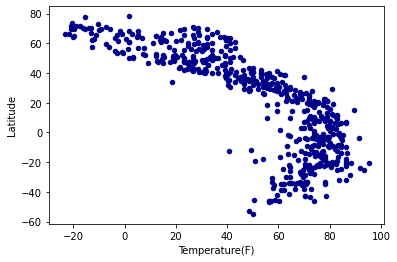

In [14]:
temp_plt = weather_df.plot.scatter(x='Temperature(F)',
                      y='Latitude',
                      c='DarkBlue')

In [15]:
# In the above cell, each city is plotted according to it's latitude and temperature in Fahrenheit.

## Latitude vs. Humidity Plot

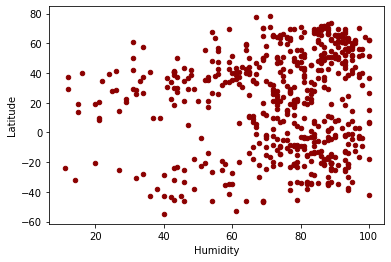

In [16]:
humidity_plt = weather_df.plot.scatter(x='Humidity',
                      y='Latitude',
                      c='DarkRed')

In [17]:
# In the above cell, each city is plotted according to it's latitude and humidity percentage.

## Latitude vs. Cloudiness Plot

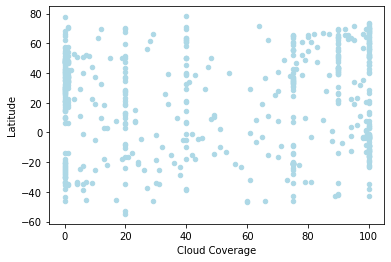

In [18]:
cloud_plt = weather_df.plot.scatter(x='Cloud Coverage',
                      y='Latitude',
                      c='LightBlue')

In [19]:
# In the above cell, each city is plotted according to it's latitude and cloud coverage percentage.

## Latitude vs. Wind Speed Plot

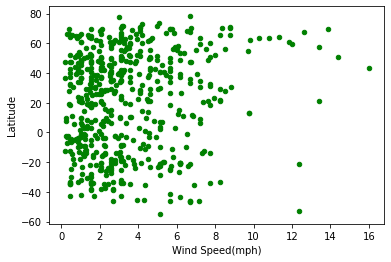

In [20]:
wind_plt = weather_df.plot.scatter(x='Wind Speed(mph)',
                      y='Latitude',
                      c='Green')

In [21]:
# In the above cell, each city is plotted according to it's latitude and wind speed(mph).

## Linear Regression

In [22]:
# create new dataframes from weather_df for northern and southern hemispheres
southern_hemi_df = weather_df.loc[(weather_df['Latitude']) <= 0]
northern_hemi_df = weather_df.loc[(weather_df['Latitude']) >= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

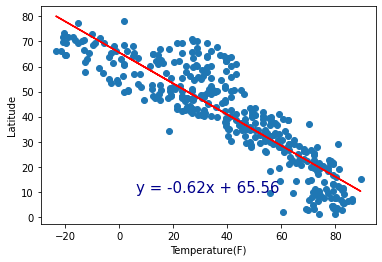

In [23]:
# Add the linear regression equation and line to plot
x_values = northern_hemi_df['Temperature(F)']
y_values = northern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="darkblue")
plt.xlabel('Temperature(F)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

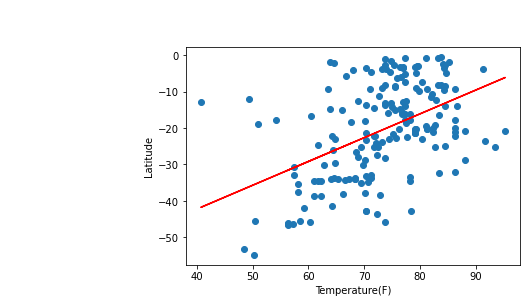

In [24]:
# Add the linear regression equation and line to plot
x_values = southern_hemi_df['Temperature(F)']
y_values = southern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Temperature(F)')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

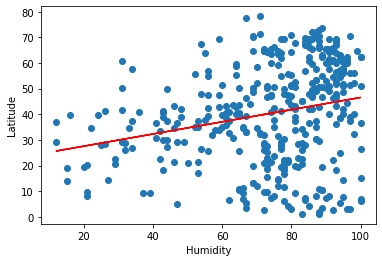

In [25]:
# Add the linear regression equation and line to plot
x_values = northern_hemi_df['Humidity']
y_values = northern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

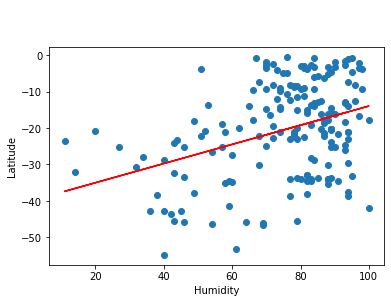

In [26]:
# Add the linear regression equation and line to plot
x_values = southern_hemi_df['Humidity']
y_values = southern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

In [27]:
# The correlation between latitude and humidity (while still present) is minimal.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

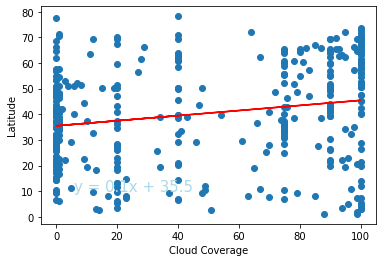

In [28]:
# Add the linear regression equation and line to plot
x_values = northern_hemi_df['Cloud Coverage']
y_values = northern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="lightblue")
plt.xlabel('Cloud Coverage')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

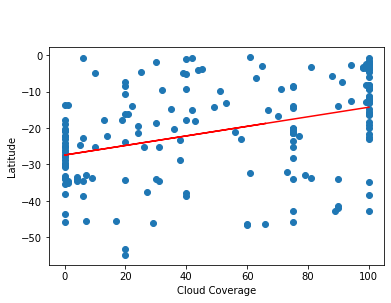

In [29]:
# Add the linear regression equation and line to plot
x_values = southern_hemi_df['Cloud Coverage']
y_values = southern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="lightblue")
plt.xlabel('Cloud Coverage')
plt.ylabel('Latitude')
plt.show()

In [30]:
# There is no correlation between a city's cloud coverage and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

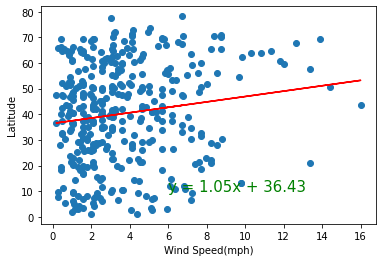

In [31]:
# Add the linear regression equation and line to plot
x_values = northern_hemi_df['Wind Speed(mph)']
y_values = northern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="green")
plt.xlabel('Wind Speed(mph)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

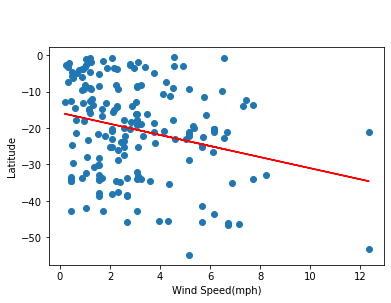

In [32]:
# Add the linear regression equation and line to plot
x_values = southern_hemi_df['Wind Speed(mph)']
y_values = southern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="green")
plt.xlabel('Wind Speed(mph)')
plt.ylabel('Latitude')
plt.show()

In [33]:
# There is no correlation between a city's latitude wind speed.